<a href="https://colab.research.google.com/github/WinnieAnyoso/R_Supervised-and-unsupervised/blob/master/w13_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###RESEARCH QUESTION

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

###Metrics Of Success

1.Perform Univariate and bivariate analysis and give insights based on the findings. 
2. Obtain  an accuracy of 85% and above
###Context 
In the recent past there has been an increase in the number of online click ads. This is because website owners and bloggers have realised that they could actually make money from the number of clicks on the ads they choose to advertise on their websites. 

It is therefore necessary to create content that would be a target audience's preferance in order to get them to their website(blog) and hopefully get them to click on the ads displayed. 

###Experimental Design

1. Load the dataset
2. Explore the data i.e. find information and summaries of all the columns 
3. Clean the data i.e. check and deal with missing data, duplicates and outliers in the dataset
4. Perform Univariate and Bivariate analysis. 
5. Implement the solution
6. Challenge the solution
7. Conclusions and Recommendations.




#1.Loadin the dataset and having a preview 

In [67]:
data<- read.csv("advertising.csv", header = TRUE, sep = ",")
head(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


#2.Data Exploration 

In [2]:
# Gives information about each column 
str(data)
 

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [3]:
# Gives a statistical summary of each column. For non-numerical columns, the frequency is 
# displayed. 
summary(data)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [4]:
dim(data)

[1] 1000   10

- Dataset has 1000 rows and 10 columns 

#3.Data Cleaning 

In [5]:
# checking for missing values in each column
# Now we'll check for the sum of missing numbers in each column 

colSums(is.na(data))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

- There are no missing values in the dataset 

In [6]:
# Now checking for duplicates i.e. duplicated rows. 
duplicated_rows <- data[duplicated(data),]

# printing out the duplicated rows
duplicated_rows

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>


- There aren't any rows that are duplicated. 

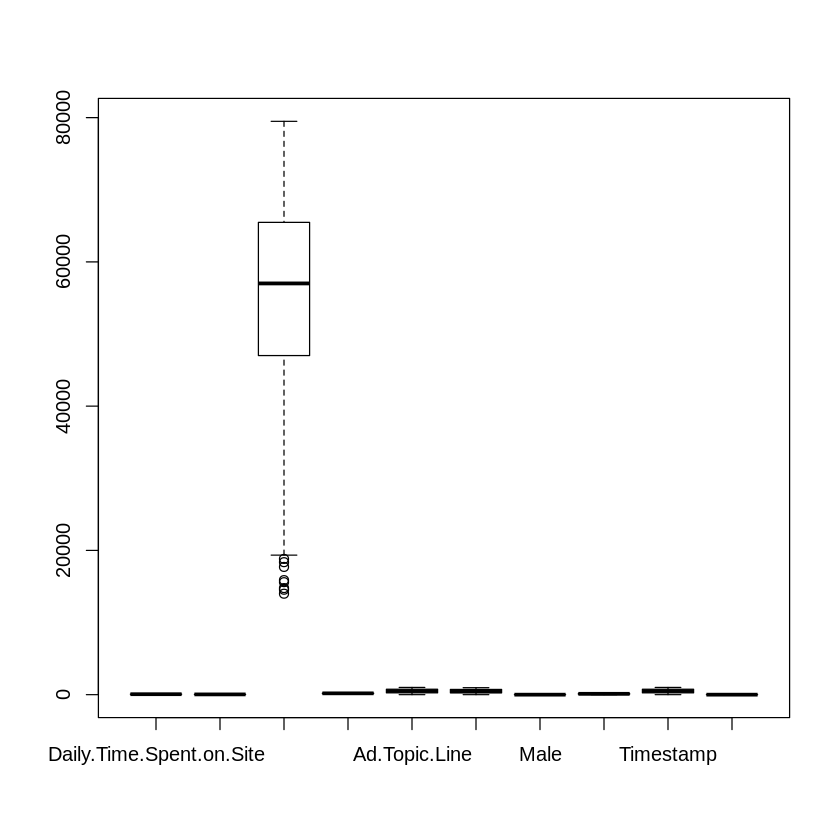

In [7]:
# Box plots help visualize and identify columns with outlierss
boxplot(data)

- From the box plot it is clear to see that the Area.Income column has outliers. We will however not drop any of the outliers in that column since they could be a true recorded observation.

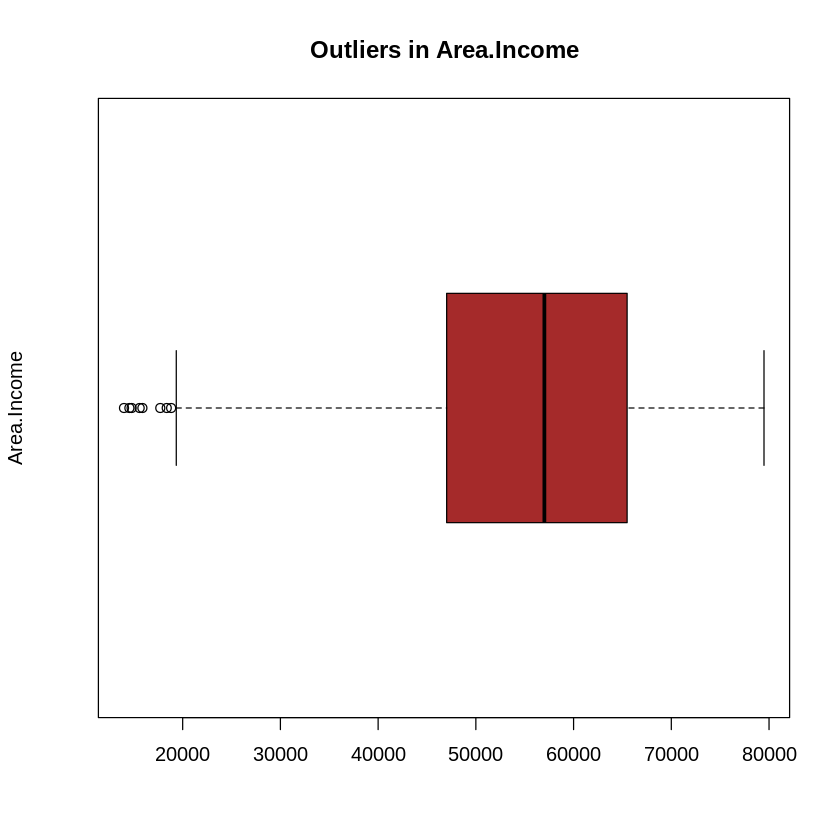

In [8]:
# Getting a better look at the outliers in the Age.Income column
boxplot(data$Area.Income,
main = "Outliers in Area.Income",
ylab = "Area.Income",
col = "brown",
border = "black",
horizontal = TRUE
)

#4.Exploratory Data Analysis

##Univariate Analysis

###Mean

In [10]:
# mean of the daily time spent on site
mean(data$Daily.Time.Spent.on.Site)

[1] 65.0002

- The averge daily time spent on the site is 65 minutes. 

In [11]:
# mean of the daily time spent on the internet 
mean(data$Daily.Internet.Usage)


[1] 180.0001

- The average number of minutes a user spends on the Internet is about 180 minutes daily. 

In [12]:
# mean of the Age of the of the site visitors
mean(data$Age)

[1] 36.009

- Mean age is 36. 

### Plots 

In [13]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




###Density plot

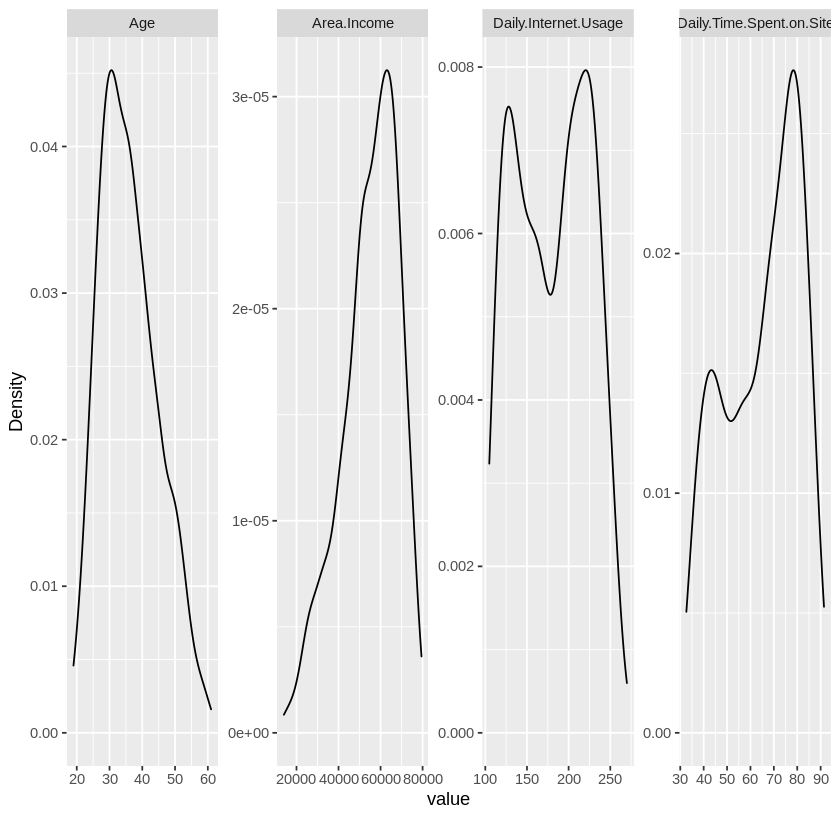

In [37]:
plot_density(data)

- Age and Area Income have a unimodal kind of distribution. 
- Daily internet usage and daily time spent on the Internet have a bimodal distribution. 

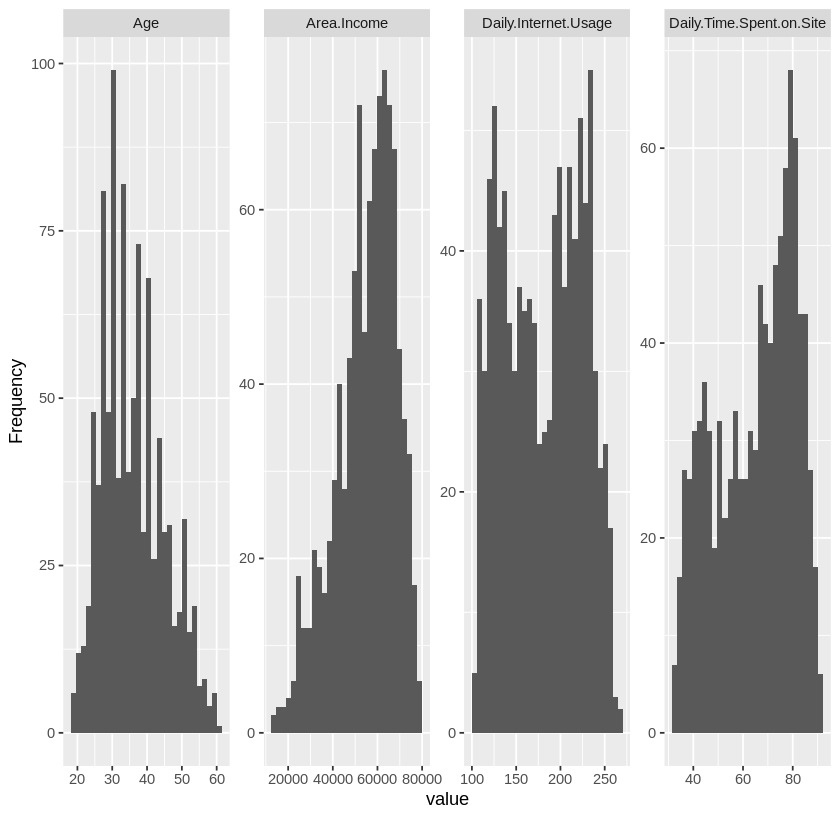

In [17]:
library(DataExplorer)
plot_histogram(data)

Histogram for average daily Internet usage

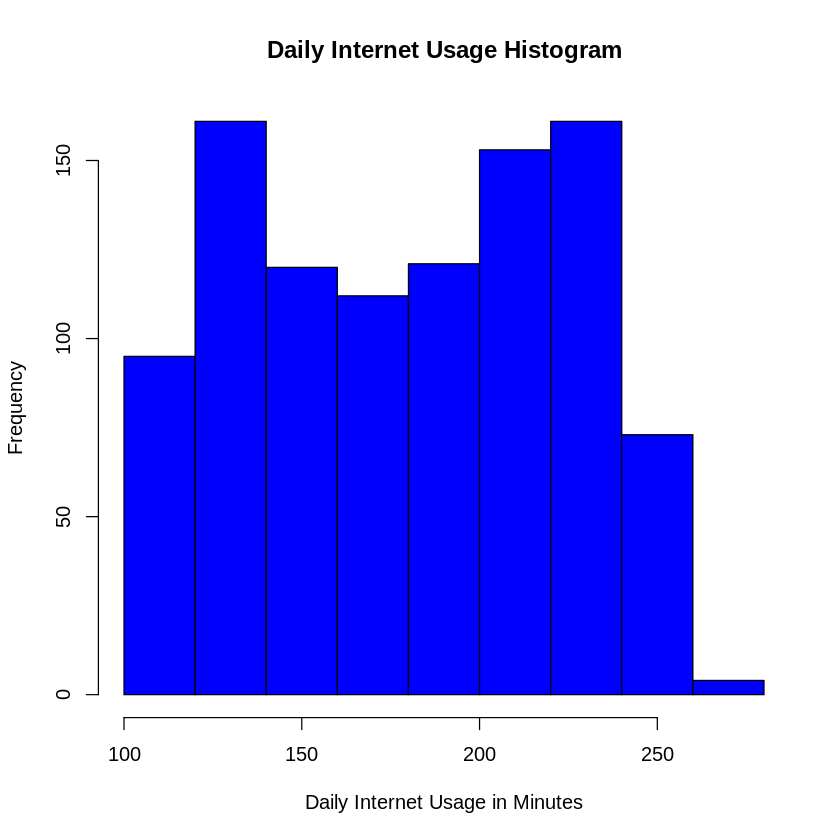

In [18]:
a<- hist(data$Daily.Internet.Usage,
          main= 'Daily Internet Usage Histogram',
          xlab = "Daily Internet Usage in Minutes",
          col ='blue')

- There daily internet usage for the users ranges from 100 ang going up to beyond 275. More people fall under the 120-140 average minutes daily and 200-240 minutes. 

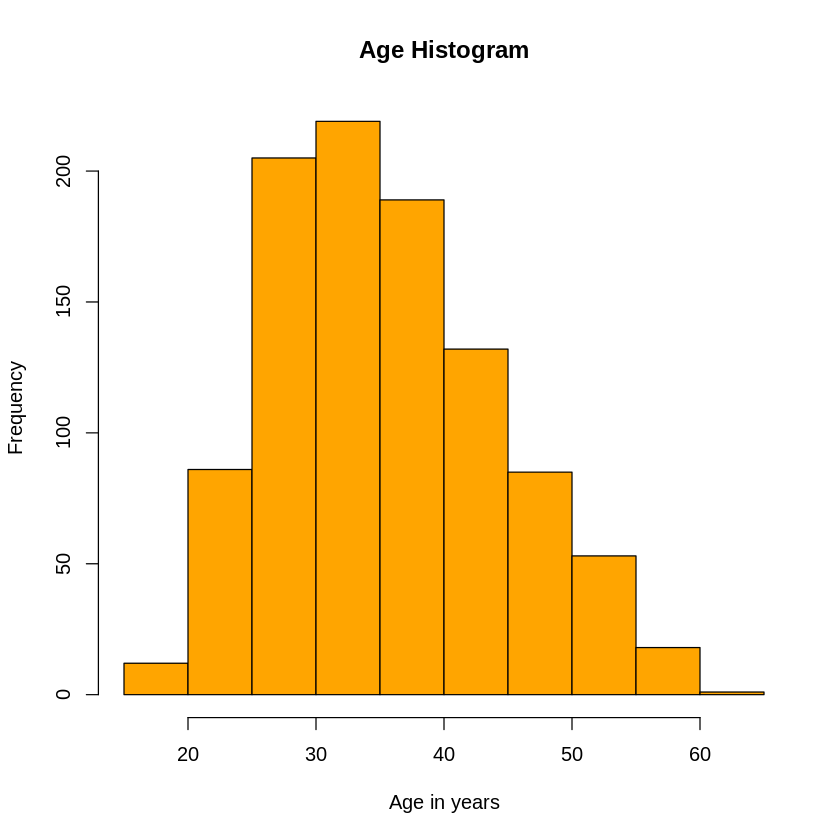

In [19]:
b<- hist(data$Age, 
          main= 'Age Histogram',
          xlab = "Age in years",
          col ='orange')

- There are more users between the ages of 20 and 40. This could be attributed to the youth age where individuals learn online and therefore more likely to be learning from this site. Therefore more content that is age appropriate i.e age 20-40 should be uploaded on the blog to gain more traffic. 

- There are however users that are above 40. This could be individuals or employees or are using the website content mainly to refresh memory or for reference in their work. 

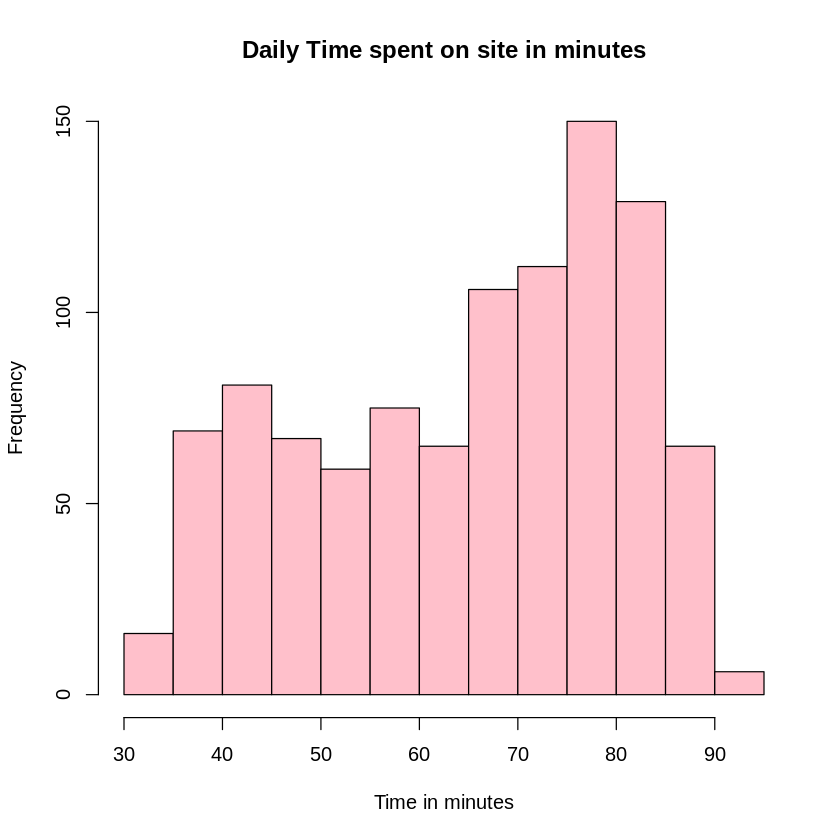

In [20]:
c<- hist(data$Daily.Time.Spent.on.Site,
          main= "Daily Time spent on site in minutes",
          xlab = "Time in minutes",
          col ='pink')

- The highest number of minutes spent on the website is 75-80 minutes. 

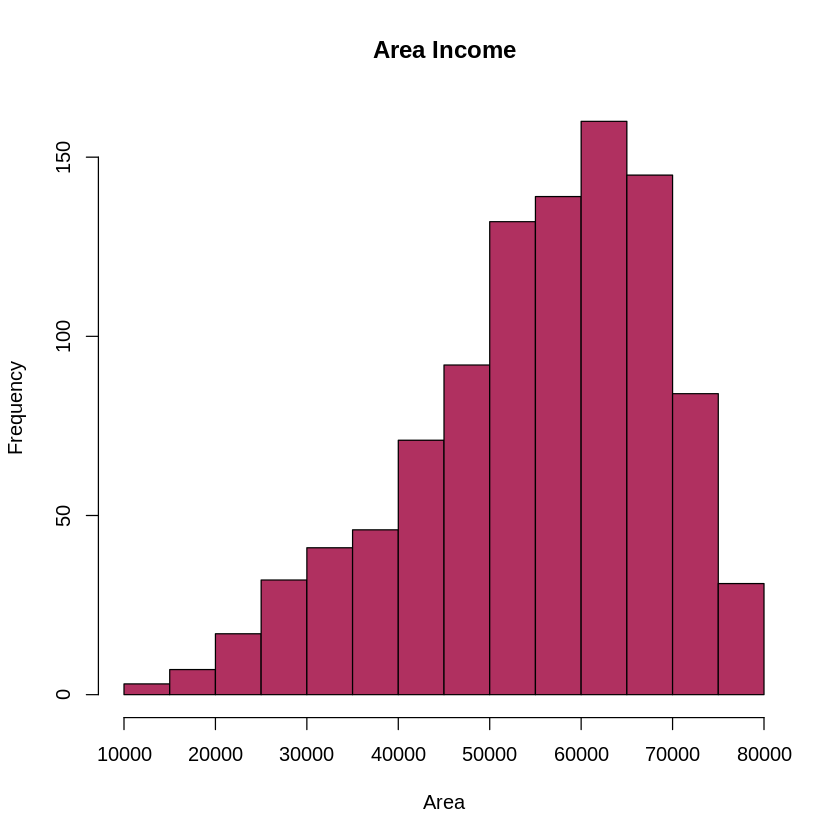

In [21]:
d<- hist(data$Area.Income,
          main= 'Area Income',
          xlab = "Area",
          col ='maroon')

- Most of the Areas os income range between 40000-75000 with the highest being 60000-65000

In [22]:
frequency = table(data$Clicked.on.Ad)
frequency 


  0   1 
500 500 

There was an equal number of males and females in the sample data. 

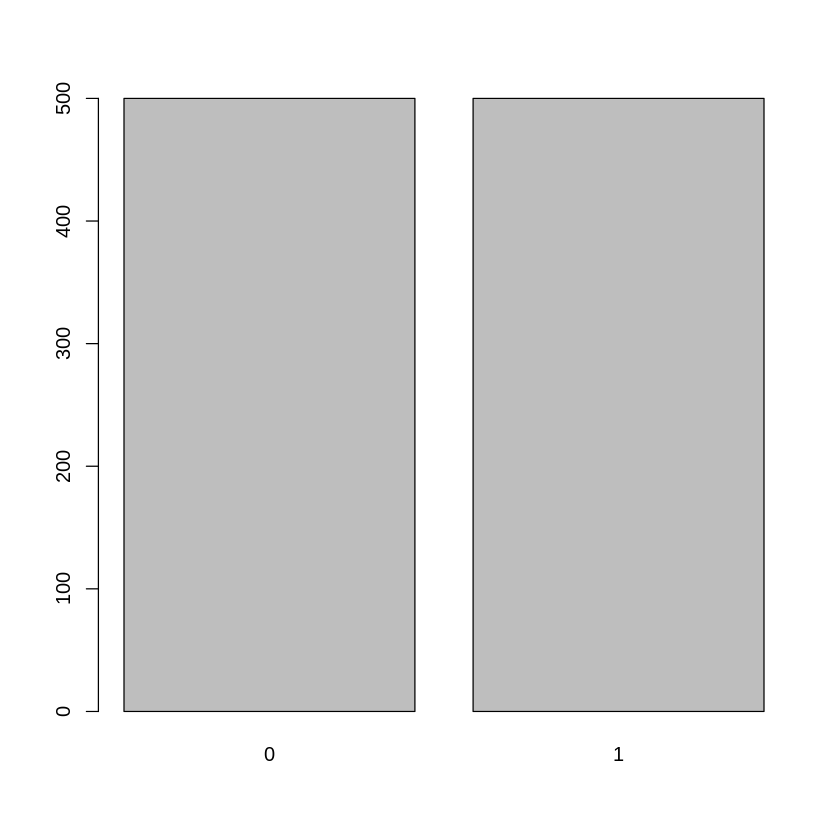

In [23]:
barplot(frequency)

- There were 500 males and 500 females

##Bivariate Analysis 


covariance

In [26]:

timespent <- data$Daily.Time.Spent.on.Site
internetusage<- data$Daily.Internet.Usage

cov(timespent, internetusage)

[1] 360.9919

- The covariance between time spent and internet Usage is 360. This means that there is a high correlation between these two variables. 

Correlation

In [27]:
cor(timespent, internetusage)

[1] 0.5186585

- There's a positive high medium correlation between time spent on site and internet usage 

Scatter plots


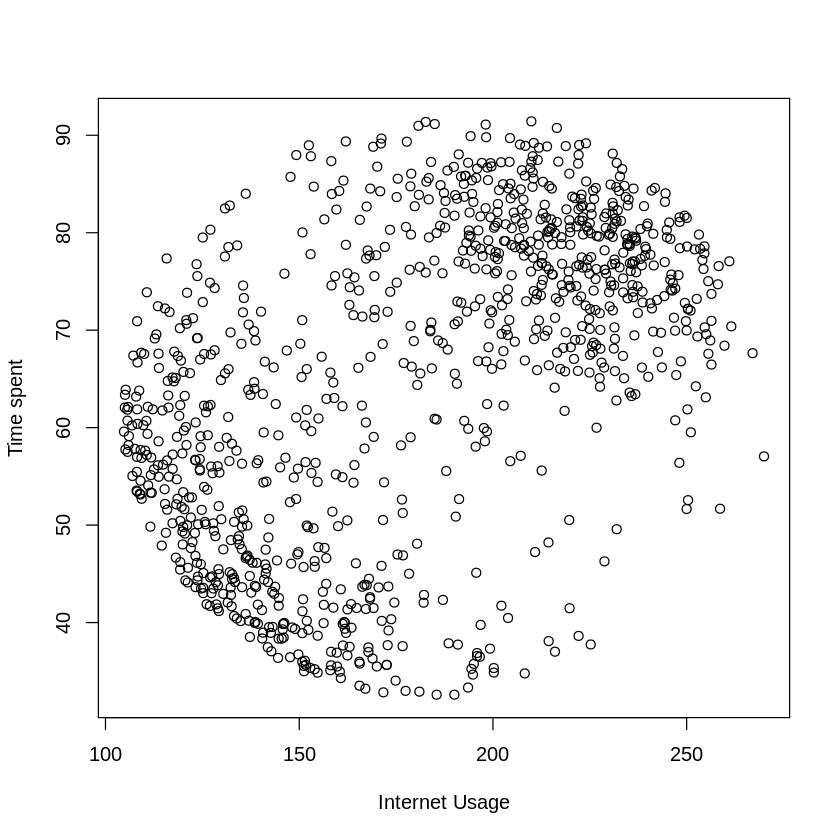

In [28]:

timespent <- data$Daily.Time.Spent.on.Site
internetusage<- data$Daily.Internet.Usage
plot(timespent ~ internetusage, data = data, xlab = "Internet Usage",ylab= "Time spent")

- From the graph, the is a postive correlation between time spent on site and internet usage. An increase in the number of minutes spent on the internet leads to a corresponding increase in the time spent on the site. 

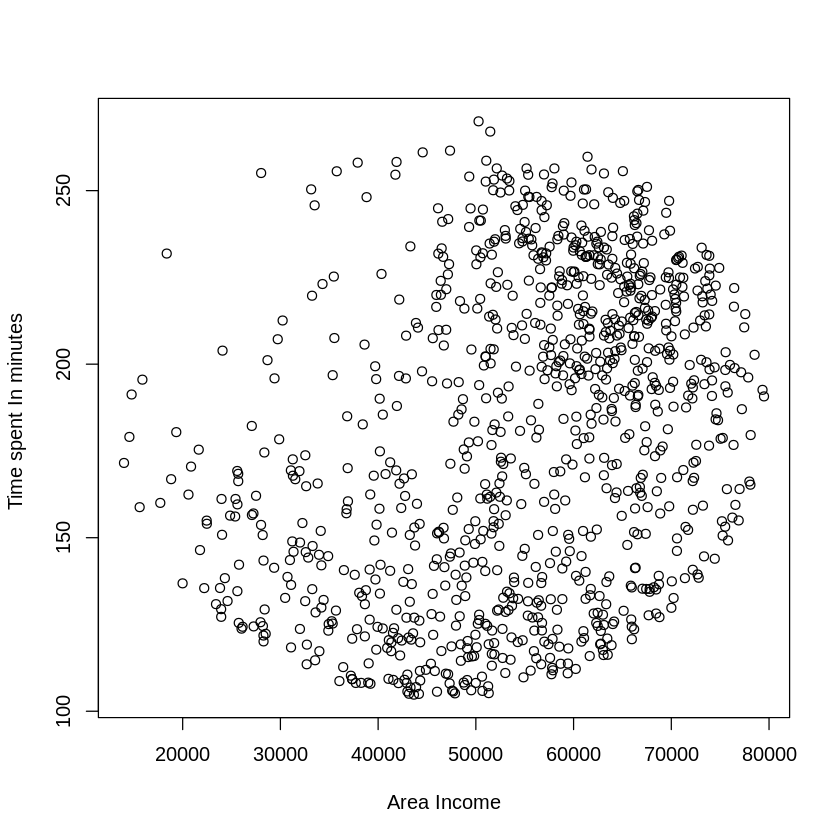

In [29]:
plot(internetusage ~ Area.Income, data = data, xlab = "Area Income",ylab= "Time spent In minutes ")

- Area income and Time spent on site have a positive correlation. An increase in the number of minutes(time) spent on the site leads to an increase in the Area income. 

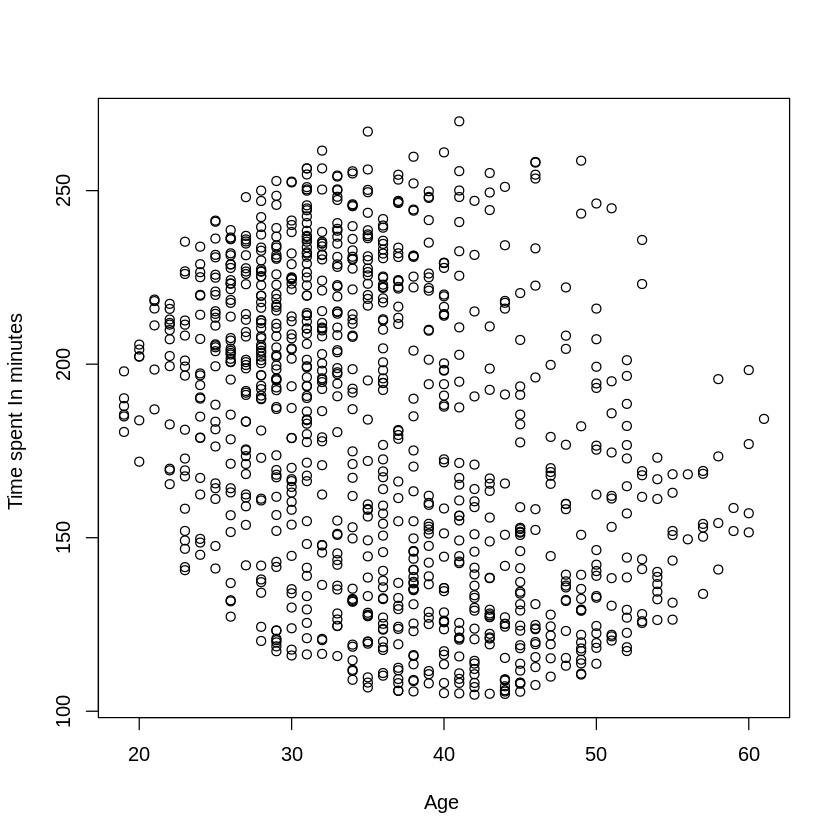

In [30]:
plot(internetusage ~Age , data = data, xlab = "Age ",ylab= "Time spent In minutes ")

- The plot above showa that a decrease in the age leads to an increase in the time spent on the site. Younger people have the tendancy, according to the data and the findings, to spend more time on the site. Therefore more age appropriate(for the younger generation/ youth) should be uploaded and posted on the website and also, ads uploaded should target this audience. - 

- For example ads with tours and treval and entrepreneurship should be contained on the ads on the site as compared to having walking sticks  for sale on the ads. 

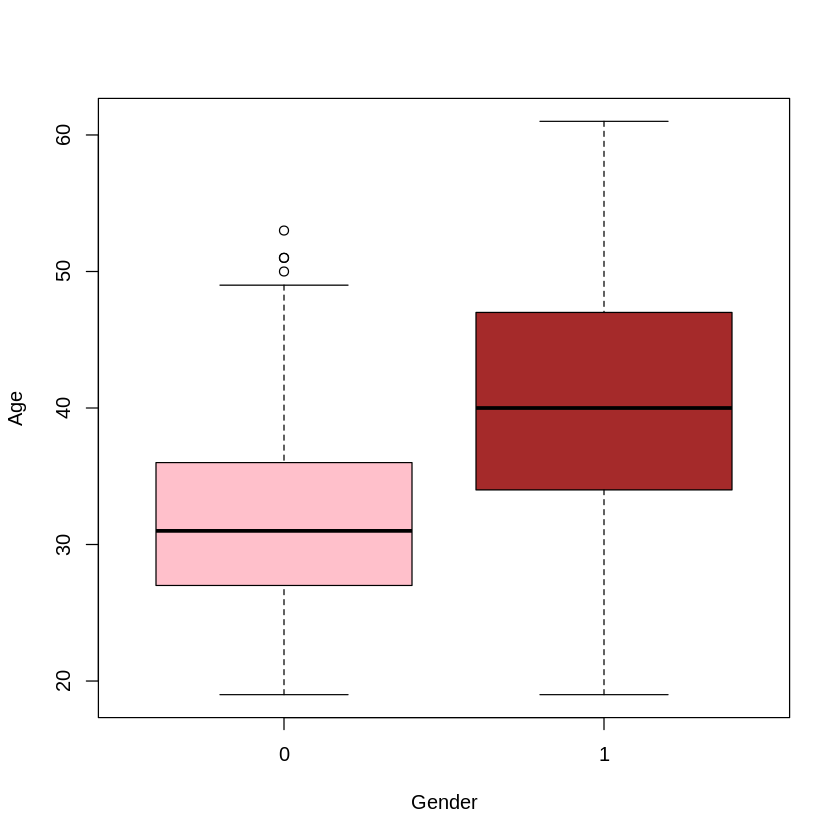

In [31]:
# 
boxplot(data$Age~data$Clicked.on.Ad,xlab= "Gender", ylab="Age",col = c('pink','brown'),notch = F)

- The Male population that visited the blog tend to have an average age younger than that of their female counterparts.

In [ ]:
library(ggplot2)

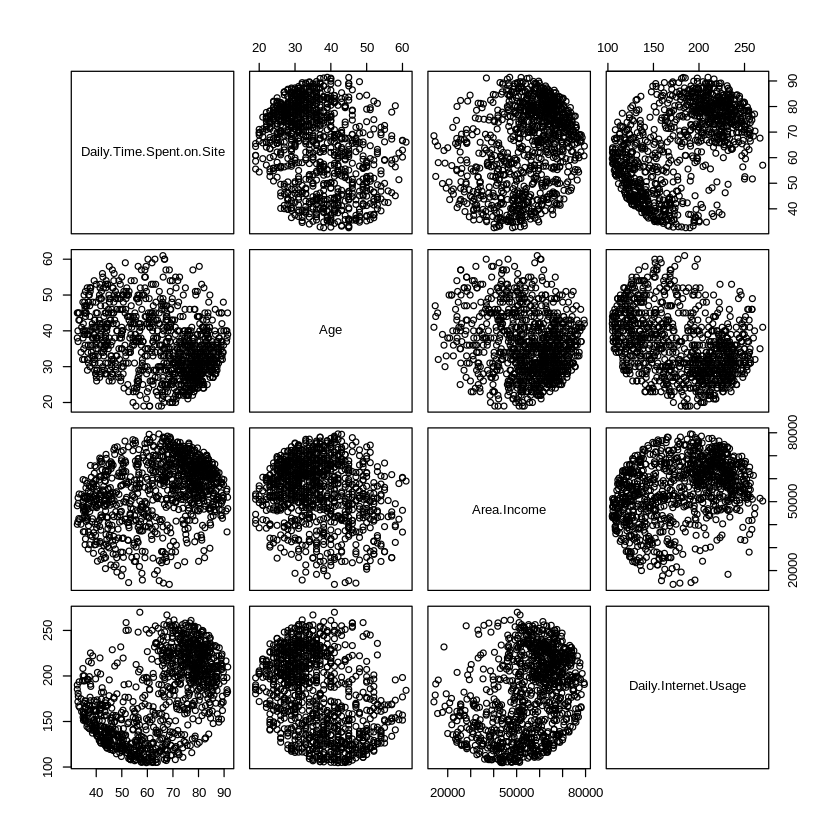

In [32]:
# pair plot 
pairs(data[, c(1,2,3, 4)])

- Most variables herein are postively correlated. 

In [33]:
# Selecting Numeric data for the sake of correlation
my_data <- data[, c(1:4)]
head(my_data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
,<dbl>,<int>,<dbl>,<dbl>
1,68.95,35,61833.90,256.09
2,80.23,31,68441.85,193.77
3,69.47,26,59785.94,236.50
4,74.15,29,54806.18,245.89
5,68.37,35,73889.99,225.58
6,59.99,23,59761.56,226.74


In [34]:
res <- cor(my_data)
round(res, 2)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage
Daily.Time.Spent.on.Site,1.00,-0.33,0.31,0.52
Age,-0.33,1.00,-0.18,-0.37
Area.Income,0.31,-0.18,1.00,0.34
Daily.Internet.Usage,0.52,-0.37,0.34,1.00


In [35]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.84 loaded



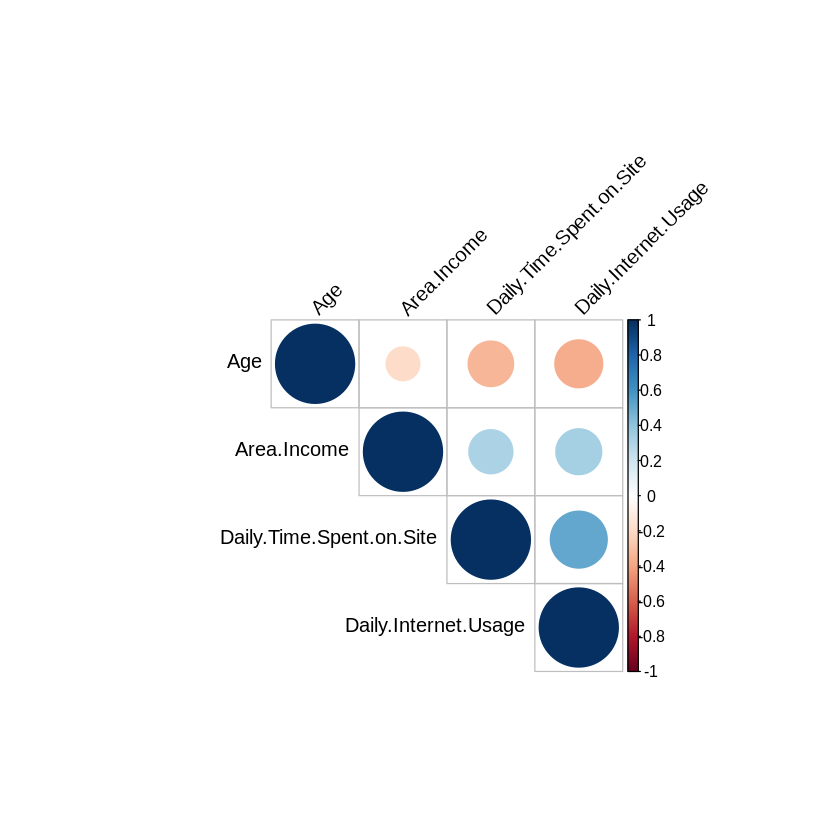

In [36]:
library(corrplot)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

#5.Implementing the solution

###Decision Trees

In [58]:
# install rpart and rpart.plot

install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [69]:
num_col <- c( "Daily.Time.Spent.on.Site", "Age" ,"Area.Income" ,"Daily.Internet.Usage","Male","Clicked.on.Ad")
num_col

[1] "Daily.Time.Spent.on.Site" "Age"                     
[3] "Area.Income"              "Daily.Internet.Usage"    
[5] "Male"                     "Clicked.on.Ad"

In [70]:
num_table <- data[, num_col]
head(num_table)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,68.95,35,61833.90,256.09,0,0
2,80.23,31,68441.85,193.77,1,0
3,69.47,26,59785.94,236.50,0,0
4,74.15,29,54806.18,245.89,1,0
5,68.37,35,73889.99,225.58,0,0
6,59.99,23,59761.56,226.74,1,0


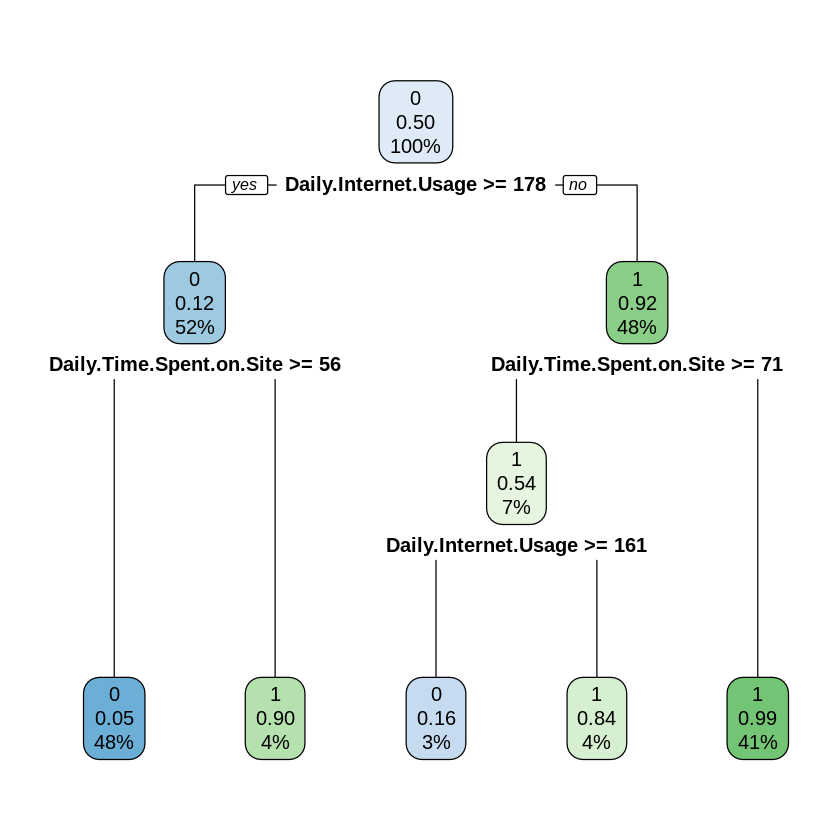

In [71]:
m <- rpart(Clicked.on.Ad ~ ., data = num_table,
           method = "class")

rpart.plot(m)

In [73]:
# prediciting
predicted <- predict(m, num_table, type = "class")
table(predicted, num_table$Clicked.on.Ad)

         
predicted   0   1
        0 485  28
        1  15 472

In [76]:
mean(num_table$Clicked.on.Ad == predicted)

[1] 0.957

- Decision Trees have an accuracy of 95.7% which in totality is a good lindicator. 

##6.Challenging the solution

###Random Forests

In [40]:
sample<- sample(c(TRUE, FALSE),nrow(data),replace= T, prob = c(0.75, 0.25))
train<- data[sample, ]
test<- data[!sample, ]
dim(test)
dim(train)

[1] 244  10

[1] 756  10

In [45]:
a = c('Male', 'Clicked.on.Ad', 'Ad.Topic.Line')
for (i in a){
    data[,i] = as.factor(data[,i])
}

In [54]:
b = c('Area.Income')
for (i in b){
    data[,i] = as.integer(data[,i])
}

In [43]:
names(data)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

#5.Conclusions and recommendation



##Conclusion

1. The youth are the most when it comes to registering high number of site visits as compared to the teenagers and older people.

- I Recommend that age appropriate content be uploaded and age group target content is uploaded when it comes to the ads. This will lead to an increase in the number of clicks on ads. 

2. An Increase in the time spent on the site leads to a corresponding increase in the Income. It is therefore recommended that the blogger produce more captivating content and also keep updating the blog to avoid monotony when it comes to content and the ads. 



####6. Appriateness of the data.

- The data provided was suffcicent to give valid inferences and recommendations to help improve the number of clicks on ads and to increase traffic on the site. 